# Задания третьего урока

Строка names содержит имена в формате 'Name1 Surname1, Name2 Surname2, …'.
Поместите в переменную names_list список со строками имён – ['Name1 Surname1', 'Name2 Surname2', …]

In [ ]:
names_list = names.split(', ')

В переменной df содержатся данные такого вида

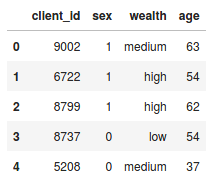

Отберите из них только те, где wealth 'medium', а возраст больше 35, и поместите в переменную medium_35

In [ ]:
medium_35 = df.query('wealth == "medium" and age > 35')

Ваш коллега-новичок перепутал названия колонок в таблице из предыдущих заданий и прислал вам такой вариант
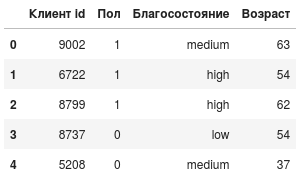
Приведите таблицу к каноничному виду, сохранив её в ту же переменную df, где сейчас находится нестандартно наименнованная таблица (воспользуйтесь методом rename)
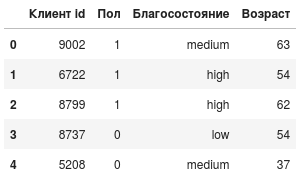
Note: колонка называется Клиент id - шрифт плохо передаёт кейс i в id

In [ ]:
df.rename(columns={'Клиент id':'client_id', 'Пол':'sex', 'Благосостояние':'wealth','Возраст':'age'}, inplace = True)

Добавьте в исследуемый нами датафрэйм df колонку older_than_30, в которой будет храниться больше ли возраст 30 лет (булиновское значение)
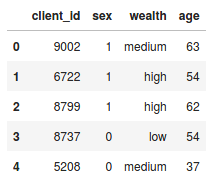

In [ ]:
df['older_than_30'] = df.age > 30

А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num
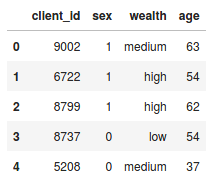

In [ ]:
unique_sum = df.nunique()

У нас появились новые данные! Переменная data хранит в себе датафрэйм следующего вида:
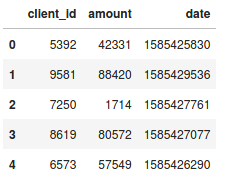
Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке client_id, и поместите результат в переменную full_data (да, придумывать переменные иногда бывает сложно)

In [ ]:
full_data = data.merge(df, how='inner', on='client_id')

💀 Сложное задание! 💀

А теперь создадим свою собственную функцию!

Напишите функцию read_n_agg, которая

принимает на вход один параметр – путь к файлу
считывает переданный файл, в котором разделителем является ;
считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)
возвращает результат этих действий (агрегированный датафрэйм)
Данные выглядят вот так, скачать датасэт можно отсюда
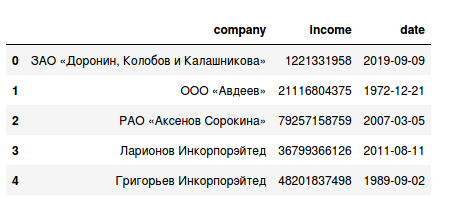
Небольшое уточнение – менять что-то в данных или переименовывать колонки не нужно

In [ ]:
def read_n_agg(path):
    file = pd.read_csv(path,sep = ';')
    income = file.groupby('company', as_index = True).agg({'income':'mean'})
    return income

Вернемся к данным по поездкам на такси! На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами, и парой других деталей!

journey_id – уникальный id поездки
user_id – id пользователя
driver_id – id водителя
taxi_id – id машины
icon – тип поездки
start_type – тип заказа (asap, reserved, delayed)
start_at – время начала поездки
start_lat – исходное местоположение пользователя, широта
start_lon – исходное местоположение пользователя, долгота
end_at – время окончания поездки
end_lat – итоговое местоположение, широта
end_lon – итоговое местоположение, долгота
end_state – состояние заказа
driver_start_lat – исходное местоположение водителя, широта
driver_start_lon – исходное местоположение водителя, долгота
arrived_at – время прибытия водителя
source – платформа, с которой сделан заказ
driver_score – оценка водителя клиентом
rider_score – оценка клиента водителем
Импортируйте pandas как pd. Загрузите датасет, используя ; в качестве разделителя. Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates). Результат запишите в taxi.

In [1]:
import pandas as pd

In [4]:
taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/359240/taxi_peru.csv',sep=';', 
                   parse_dates = ['start_at', 'end_at', 'arrived_at'])
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.



In [11]:
taxi.source.value_counts(normalize = True).round()*100
# taxi.source.value_counts(normalize = True).mul(100).round() mul - от слова multiplication
# берет все, что справа от mul и умножает на число в скобках

iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
Name: source, dtype: float64

Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:

Посчитайте частоту встречаемости каждой из оценок
Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
Сбросьте индексы
Переименуйте колонки в driver_score и percentage
Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
Запишите результат в driver_score_counts

In [28]:
driver_score_counts = taxi.driver_score \
    .value_counts(normalize = True) \
    .mul(100) \
    .round(2) \
    .reset_index() \
    .rename(columns = {'index':'driver_score','driver_score':'percentage'}) \
    .sort_values(by = 'driver_score', ascending = True)
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


Теперь строим график! Сначала импортируем библиотеки:

import seaborn as sns
import matplotlib.pyplot as plt
Укажите, какую из четырех строчек в нижепредставленном коде нужно исправить, чтобы получить следующий график:

ax = sns.barplot(x=driver_score, y=percentage, data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()
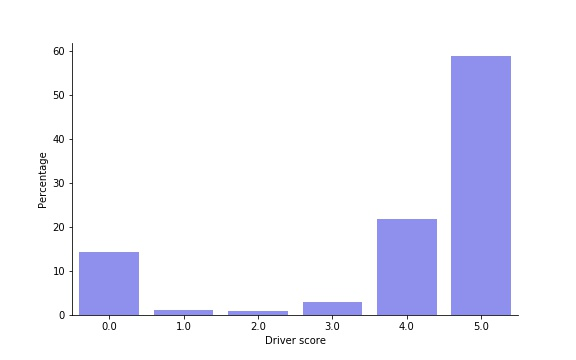

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

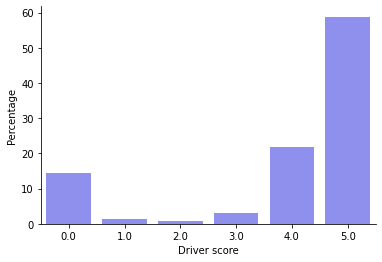

In [32]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5) 
# надо в кавычки возвести x и y в 1-ой строке
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

💀 Сложное задание! 💀

Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график. В чем его отличие от распределения оценок водителей?

In [33]:
rider_score_counts = taxi.rider_score \
    .value_counts(normalize = True) \
    .mul(100) \
    .round(2) \
    .reset_index() \
    .rename(columns = {'index':'rider_score','rider_score':'percentage'}) \
    .sort_values(by = 'rider_score', ascending = True)
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


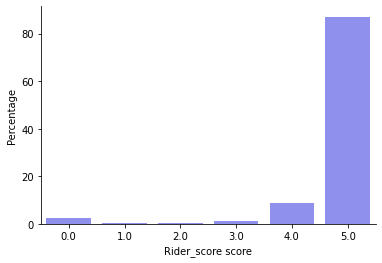

In [34]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5) 
# надо в кавычки возвести x и y в 1-ой строке
ax.set(xlabel='Rider_score score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()